In [1]:
import os
import re
import numpy as np

def retrieve_costs_to_matrix(base_dir):
    # Dictionary to hold costs organized by prefix (i)
    costs_dict = {}
    
    # Iterate through each subfolder in the base directory
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        if os.path.isdir(folder_path):
            # Extract the prefix for identifying the 'i' value
            prefix = folder_name.split('_')[0]
            
            # Path to the cost.txt file
            cost_file_path = os.path.join(folder_path, 'cost.txt')
            
            # Read the cost value from the cost.txt file
            if os.path.exists(cost_file_path):
                    with open(cost_file_path, 'r') as file:
                        # Extract the complex number part using regular expression
                        cost_str = file.read().strip()
                        match = re.search(r'\(([^)]+)\)', cost_str)
                        if match:
                            complex_str = match.group(1).strip('()')
                            print(complex_str)
                            # Convert the extracted string to a complex number
                            complex_number = complex(complex_str)
                            # Get the real part and convert to float
                            float_value = complex_number.real
                            if prefix not in costs_dict:
                                costs_dict[prefix] = []
                            costs_dict[prefix].append(1 - abs(float_value))


    # Prepare the matrix
    sorted_keys = sorted(costs_dict.keys())
    matrix = []
    
    for key in sorted_keys:
        matrix.append(costs_dict[key])
    
    # Convert to numpy array for easy manipulation
    matrix_array = np.array(matrix, dtype=float)
    
    return matrix_array

# Define the base directory where the folders are located
base_directory = 'experiment_result'

# Retrieve costs and convert to matrix
cost_matrix = retrieve_costs_to_matrix(base_directory)

print("Cost Matrix:")
print(cost_matrix)


4.4404747101545183e-08+0j
1.2687399062460969e-06+0j
-1.2463752405711404e-06+0j
-8.073737843616868e-06+0j
-1.2578729784440412e-05+0j
-1.3792744269158774e-05+0j
-1.3206366332951802e-05+0j
-1.1895386780036432e-05+0j
-1.037097037803747e-05+0j
-8.844407766162021e-06+0j
-7.393810526501454e-06+0j
-6.0423209327087335e-06+0j
-4.792328462732698e-06+0j
-3.640019172301834e-06+0j
-2.5812457802310007e-06+0j
-1.6135141107653794e-06+0j
-7.361377405423752e-07+0j
5.062816954559679e-08+0j
7.471208257614492e-07+0j
1.3560753389096902e-06+0j
1.8840927908936322e-06+0j
2.34216983818758e-06+0j
2.7450211239621325e-06+0j
3.109291053293717e-06+0j
3.4509517208292095e-06+0j
3.7827585552818732e-06+0j
4.11427239088713e-06+0j
4.454548191756835e-06+0j
4.845516795137783e-06+0j
5.249084255920522e-06+0j
5.821738257250075e-06+0j
6.53530735617025e-06+0j
7.428079909610474e-06+0j
8.552057419786152e-06+0j
1.0014091723853369e-05+0j
1.1993901052109734e-05+0j
1.481896641941649e-05+0j
1.9171029671083417e-05+0j
2.680506365138058e-0

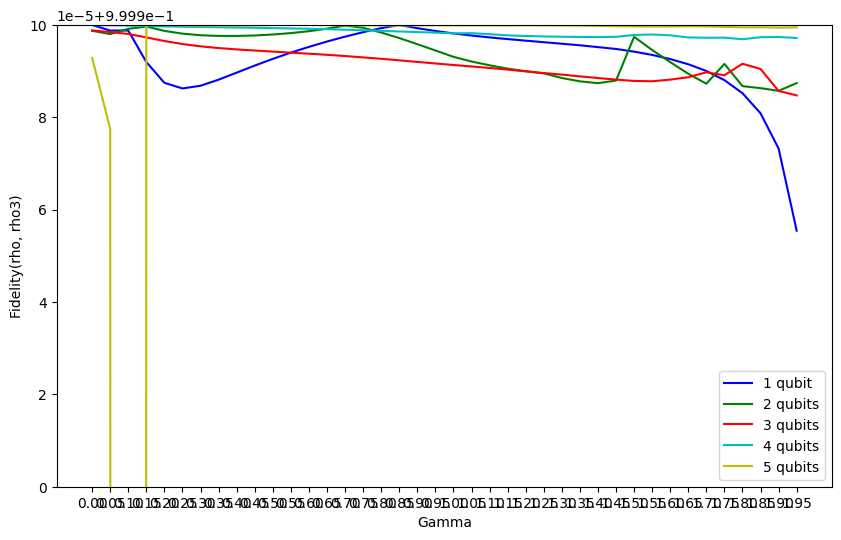

In [2]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Colors for each row
colors = ['b', 'g', 'r', 'c', 'y']  # Adjust or extend as needed
# Custom labels for each row
labels = ['1 qubit', '2 qubits', '3 qubits', '4 qubits', '5 qubits']

for i, (row, color) in enumerate(zip(cost_matrix, colors)):
    plt.plot(row, color=color, label=labels[i % len(labels)])
    
# Adding title and labels
plt.xlabel('Gamma')
plt.ylabel('Fidelity(rho, rho3)')

plt.ylim(0.9999, 1)
# Customizing x-axis ticks
x_ticks = np.arange(0, len(cost_matrix[0]), step=1)  # Adjust step size based on your data
x_tick_labels = [f'{tick/20:.2f}' for tick in x_ticks]  # Convert to float and format
plt.xticks(ticks=x_ticks, labels=x_tick_labels)

plt.legend()

# Display the plot
plt.show()